In [9]:
##Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats as sts
from scipy.interpolate import interp1d
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [10]:
bcorp_US_cleaned= pd.read_csv('bcorp_US_cleaned.csv')
bcorp_US_cleaned.head()

,Unnamed: 0,company_name,date_first_certified,date_certified,current_status,sector,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,certification_cycle
0,1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,Service with Minor Environmental Footprint,2017,115.0,51.8,40.0,13.2,10.0,NaN,1
1,2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,Service with Minor Environmental Footprint,2015,90.5,34.3,40.0,8.1,7.9,0.0,2
2,9,Bark Media,7/25/2018,7/25/2018,certified,Service with Minor Environmental Footprint,2018,90.5,49.7,20.3,7.7,12.7,NaN,1
3,10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,Service with Minor Environmental Footprint,2019,120.3,49.1,43.3,13.6,14.1,NaN,1
4,11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,Service with Minor Environmental Footprint,2016,116.7,56.5,37.5,17.3,5.4,NaN,2


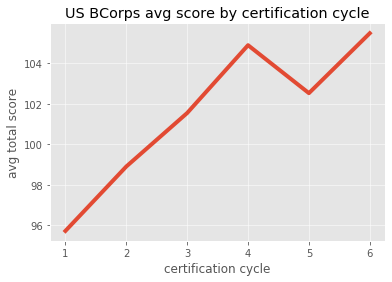

In [11]:
# Does a company’s impact score improve or worsen over the course of their tenure of certification? 
# (given that recertification is a 3 year cycle). 
avg_score=bcorp_US_cleaned.groupby('certification_cycle').mean()['overall_score']
avg_score=pd.DataFrame(avg_score)
avg_score

plt.style.use('ggplot')
plt.xlabel('certification cycle')
plt.ylabel('avg total score')
plt.title('US BCorps avg score by certification cycle')
plt.plot(avg_score, linewidth=4, markersize=10)
plt.savefig('graphs/scorebycycle_line.png')

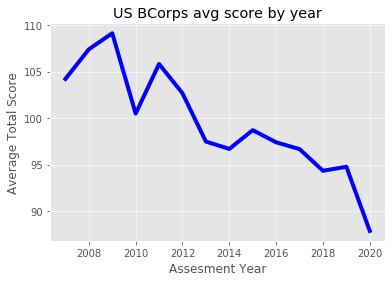

In [12]:
bcorp_US_cleaned.groupby(['assessment_year']).mean()['overall_score'].plot(linewidth=4, color="blue")

plt.style.use('ggplot')
plt.xlabel('Assesment Year')
plt.ylabel('Average Total Score')
plt.title('US BCorps avg score by year')
plt.savefig('graphs/avgscorebyyear_line.png')
plt.show()

In [13]:
bcorp_US_cleaned['date_first_certified'] = pd.to_datetime(bcorp_US_cleaned['date_first_certified'], errors='coerce')
bcorp_US_cleaned['firstcertyear'] = bcorp_US_cleaned['date_first_certified'].dt.year
bcorp_US_cleaned.head()

,Unnamed: 0,company_name,date_first_certified,date_certified,current_status,sector,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,certification_cycle,firstcertyear
0,1,Heather Paulsen Consulting,2015-12-30,12/19/2017,certified,Service with Minor Environmental Footprint,2017,115.0,51.8,40.0,13.2,10.0,NaN,1,2015
1,2,Heather Paulsen Consulting,2015-12-30,12/30/2015,certified,Service with Minor Environmental Footprint,2015,90.5,34.3,40.0,8.1,7.9,0.0,2,2015
2,9,Bark Media,2018-07-25,7/25/2018,certified,Service with Minor Environmental Footprint,2018,90.5,49.7,20.3,7.7,12.7,NaN,1,2018
3,10,Kosmenko & Co.,2016-08-30,11/7/2019,certified,Service with Minor Environmental Footprint,2019,120.3,49.1,43.3,13.6,14.1,NaN,1,2016
4,11,Kosmenko & Co.,2016-08-30,8/30/2016,certified,Service with Minor Environmental Footprint,2016,116.7,56.5,37.5,17.3,5.4,NaN,2,2016


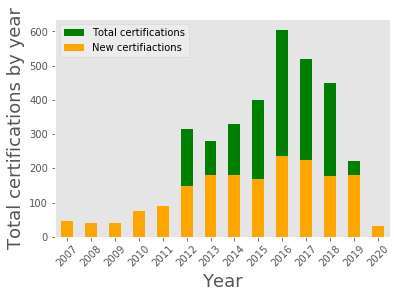

In [14]:
assesyr = bcorp_US_cleaned.groupby(['assessment_year'])['company_name'].count()
newcerts=bcorp_US_cleaned.groupby(['firstcertyear'])['company_name'].nunique()


fig, ax1 = plt.subplots()

# assesyr.plot(kind='bar')
plt.style.use('bmh')
assesyr.plot(kind='bar', color='green', label='Total certifications')
ax2 = ax1
newcerts.plot(kind='bar', color='orange', label='New certifiactions')
ax2.grid(b=False)
plt.ylabel("Total certifications by year", fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.legend()
plt.xticks(rotation=45)
plt.savefig('graphs/certificationsperyear.png')

plt.show()

In [15]:
bcorp_US_cleaned.sector.unique()

array(['Service with Minor Environmental Footprint', 'Wholesale/Retail',
       'Service with Significant Environmental Footprint',
       'Manufacturing', 'Agriculture/Growers', 'Service'], dtype=object)

In [16]:
from scipy.stats import sem
sem = sem(bcorp_US_cleaned.overall_score)
sem

0.29602680236164886

C:\Users\phill\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\phill\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\phill\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


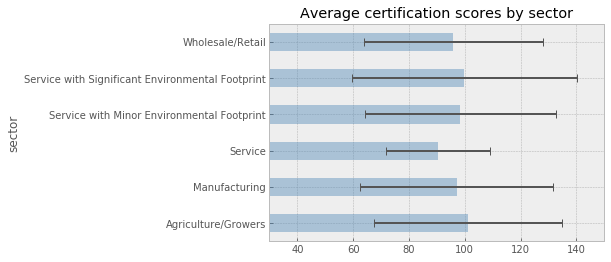

In [17]:
def double_std(array):
 return np.std(array) * 2
import scipy.stats as sp 

by_sectors=bcorp_US_cleaned.groupby('sector').agg([np.mean, double_std, sp.sem])
sector_avgs=by_sectors["overall_score"]

# sector_avgs

sector_avgs.plot(kind = "barh", y = "mean", legend = False, title = "Average certification scores by sector",
                 xerr = "double_std", linewidth = 1.5, color = "steelblue", alpha = 0.4, capsize = 4)
plt.xlim((30,150))
plt.savefig('graphs/avgscorebysector_barh.png')
# sector_avgs.plot(kind = "bar", y = "mean", legend = False, title = "Average Avocado Prices", )

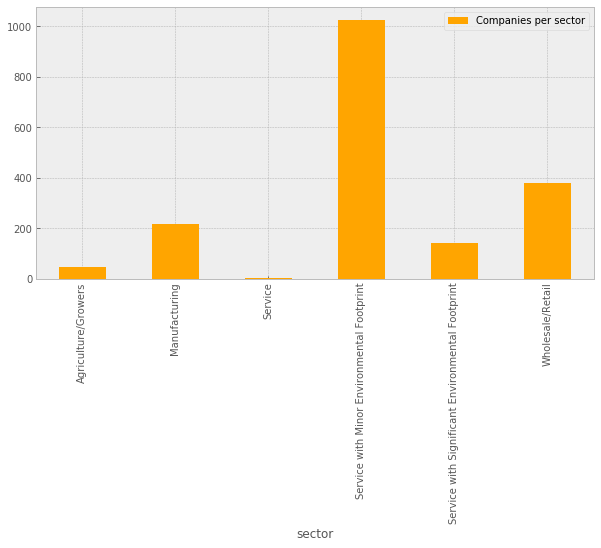

In [18]:
by_sector=bcorp_US_cleaned.groupby('sector').nunique()['company_name']
by_sector=pd.DataFrame(by_sector)
# by_sector
plt.style.use('bmh')
by_sector.plot(kind="bar", figsize=(10,5), color="orange")
plt.legend(['Companies per sector'])
plt.savefig('graphs/companiespersector_bar.png')

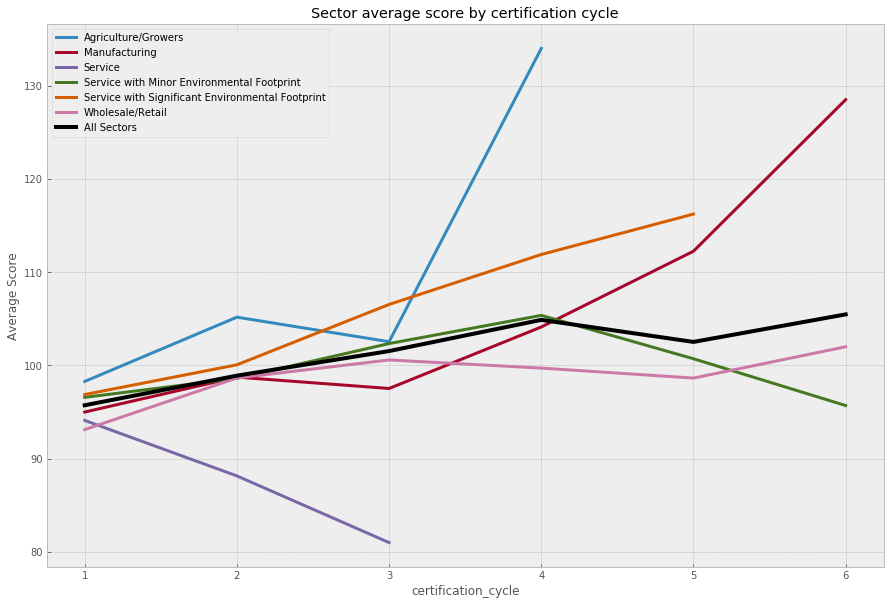

In [19]:
fig, ax = plt.subplots(figsize=(15,10))


# use unstack()
bcorp_US_cleaned.groupby(['certification_cycle', 'sector']).mean()['overall_score'].unstack().plot(ax=ax, markevery=1, linewidth=3)
bcorp_US_cleaned.groupby(['certification_cycle']).mean()['overall_score'].plot(label="All Sectors",
                                                                               color="black",
                                                                               title= "Sector average score by certification cycle",
                                                                               markevery=1,
                                                                               linewidth=4)
plt.ylabel("Average Score")
plt.legend()
fig.savefig('graphs/avgscorebysector-cycle_line.png')
plt.show()